import the `tidyverse`

In [25]:
library('tidyverse')
theme_set(theme_gray(base_size = 22))
options(repr.plot.width=8, repr.plot.height=6)

otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
    gather(characteristic, value, -species, -museum, -accession)

# We'll filter out every row in otter data except for those representing the m1 characgeristic
df.m1 = otter.data %>% filter(characteristic == 'm1') %>% drop_na()

# Filter out and leave only two types of clarity
df = diamonds %>% filter(clarity %in% c('I1', 'IF'))
df %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.32,Premium,E,I1,60.9,58,345,4.38,4.42,2.68
1.17,Very Good,J,I1,60.2,61,2774,6.83,6.90,4.13
1.01,Premium,F,I1,61.8,60,2781,6.39,6.36,3.94
0.52,Ideal,F,IF,62.2,55,2783,5.14,5.18,3.21
1.01,Fair,E,I1,64.5,58,2788,6.29,6.21,4.03
0.55,Ideal,G,IF,60.9,57,2789,5.28,5.30,3.22


# Boxplots

In [6]:
df.m1 %>% head

species,museum,accession,characteristic,value
<fct>,<fct>,<fct>,<chr>,<dbl>
A. cinerea,AMNH,101458,m1,15.100
A. cinerea,AMNH,101461,m1,12.740
A. cinerea,AMNH,101466,m1,12.425
A. cinerea,AMNH,101635,m1,13.400
A. cinerea,AMNH,101459,m1,14.400
A. cinerea,AMNH,101462,m1,14.525


Make a boxplot with `species` on the x-axis and `value` on the y-axis where value represents the `m1` characteristic.

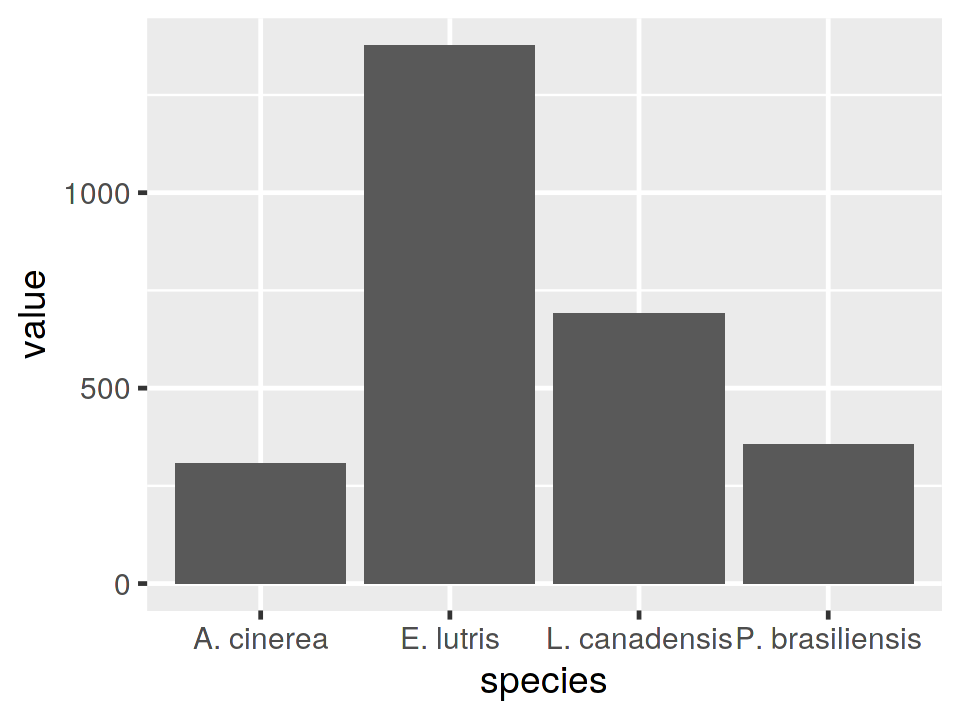

In [9]:
p = ggplot(df.m1, aes(x = species, y = value))
p = p + geom_bar(aes(y = value), stat = 'identity')
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



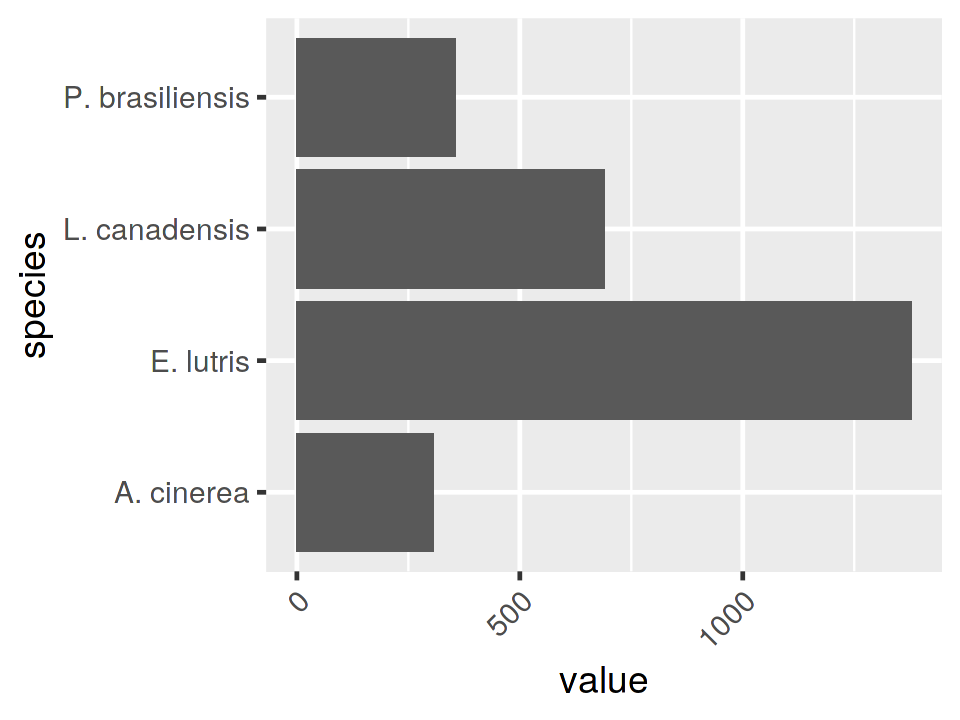

In [14]:
# Can also flip to improve readbility
p = p + coord_flip()
p

# Histograms and KDE

In [15]:
df %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.32,Premium,E,I1,60.9,58,345,4.38,4.42,2.68
1.17,Very Good,J,I1,60.2,61,2774,6.83,6.90,4.13
1.01,Premium,F,I1,61.8,60,2781,6.39,6.36,3.94
0.52,Ideal,F,IF,62.2,55,2783,5.14,5.18,3.21
1.01,Fair,E,I1,64.5,58,2788,6.29,6.21,4.03
0.55,Ideal,G,IF,60.9,57,2789,5.28,5.30,3.22


Using `facet_wrap`, plot a histogram of `price` where each plot panel represents one `clarity` value (i.e. `I1` or `IF`). 

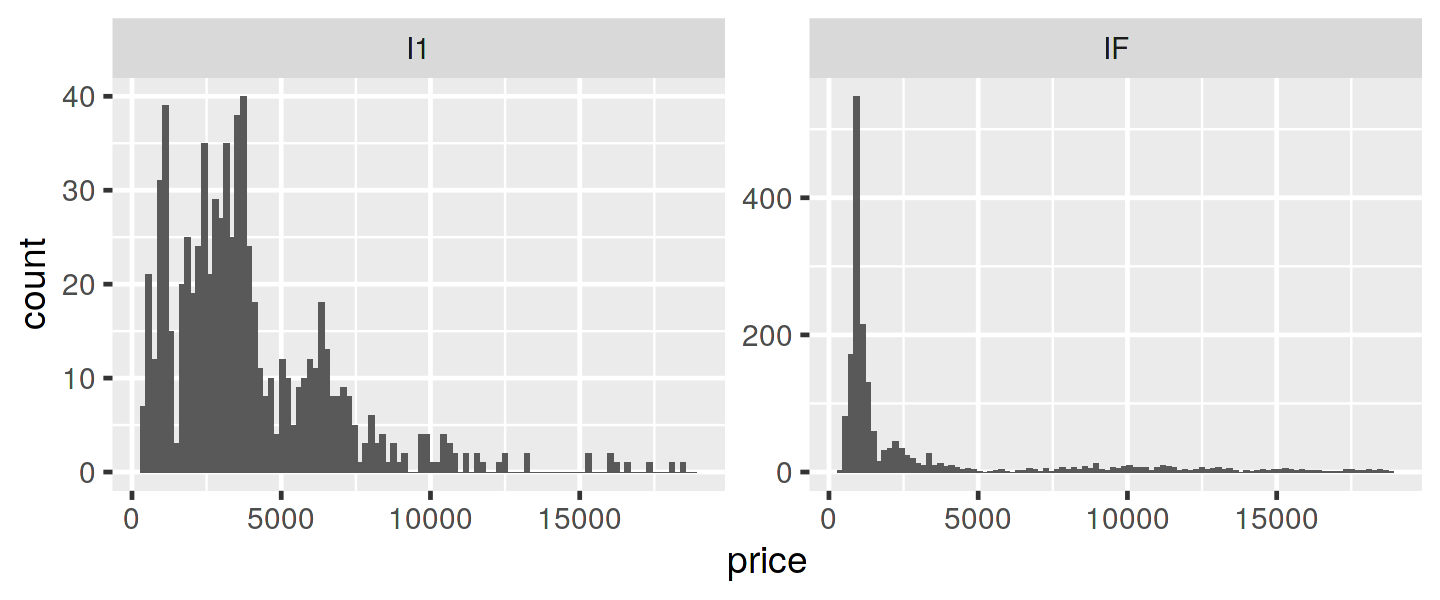

In [16]:
options(repr.plot.width=12, repr.plot.height=5)
p = ggplot(df, aes(x=price)) + geom_histogram(bins=100) + facet_wrap(~clarity, scales = 'free_y')
p

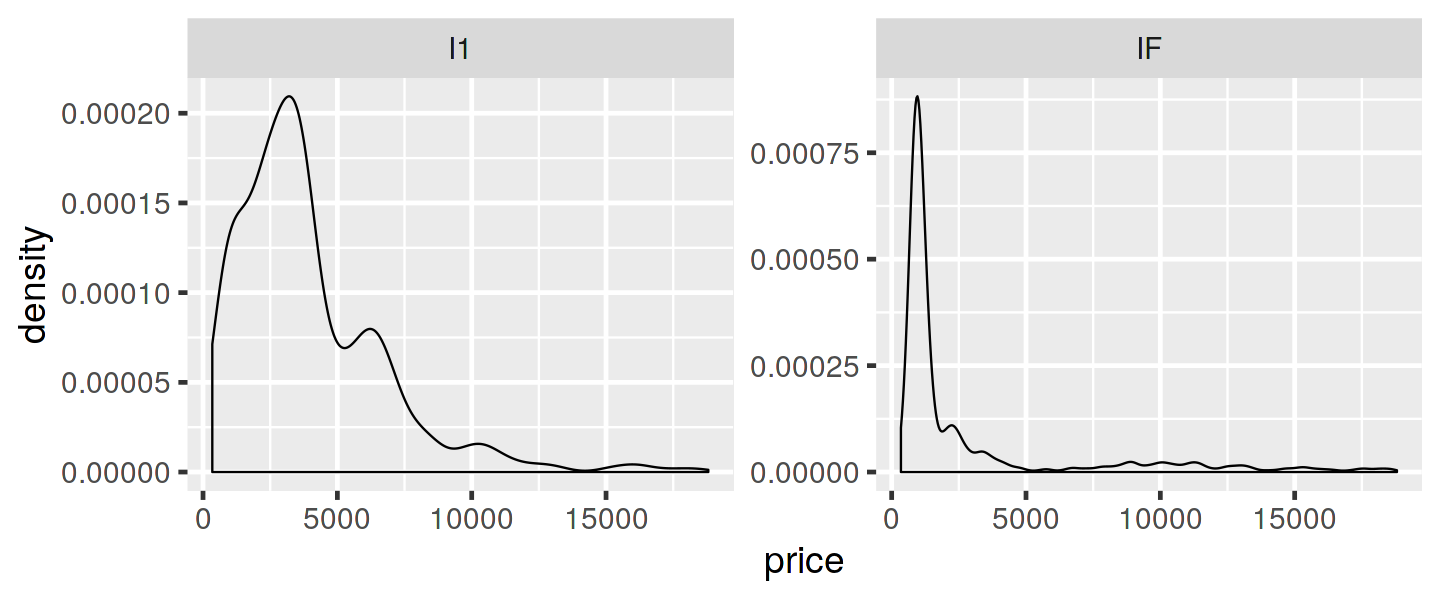

In [17]:
options(repr.plot.width=12, repr.plot.height=5)
p = ggplot(df, aes(x=price)) + geom_density() + facet_wrap(~clarity, scales='free_y')
p

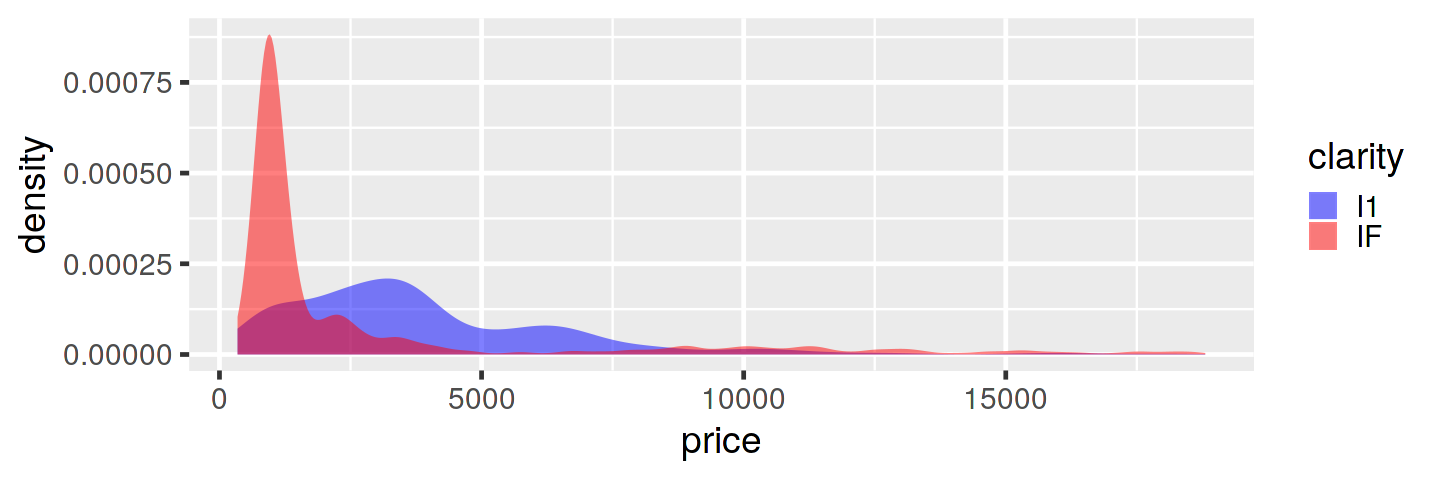

In [24]:
# Plotting clarity groups on top of each other
# Change colors to be blue and red

options(repr.plot.width=12, repr.plot.height=4)
p = ggplot(df, aes(x=price, fill = clarity)) + geom_density(alpha=0.5, color = NA)
p = p + scale_fill_manual(values=c('blue', 'red'))
p

# Rugs

Plot a histogram of `m1` values for otter skulls. Include a rug.

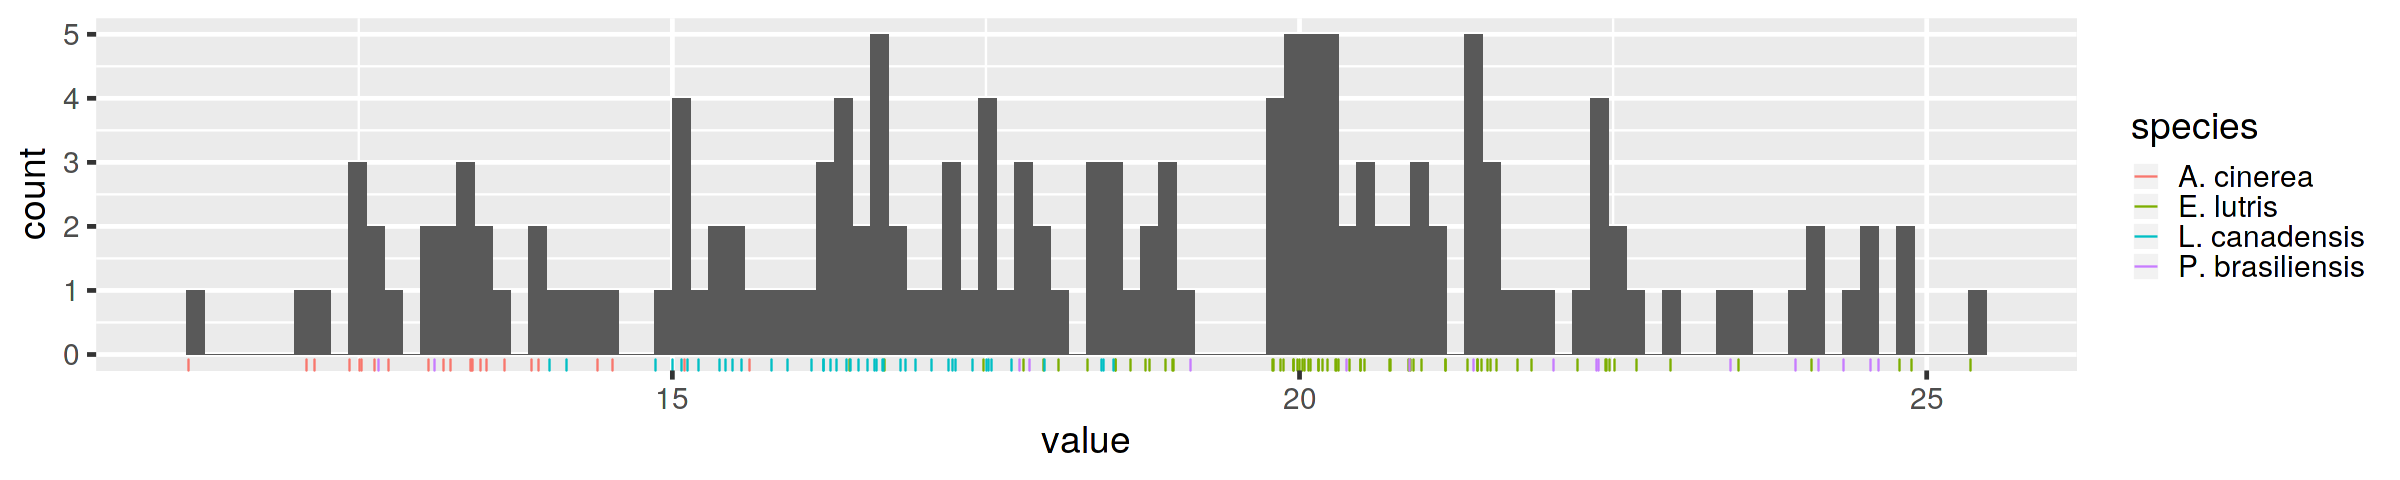

In [45]:
options(repr.plot.width=20, repr.plot.height=4)
p = ggplot(df.m1, aes(x=value)) + geom_histogram(bins=100) + geom_rug(aes(color=species))
p